In [2]:
import tensorflow as tf
import tensorflow.contrib.slim as slim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sim

In [3]:
class agent():
    def __init__(self, lr, s_size,a_size):
        #These lines established the feed-forward part of the network. The agent takes a state and produces an action.
        self.state_in= tf.placeholder(shape=[1, 10],dtype=tf.int32)
        state_in_OH = slim.one_hot_encoding(self.state_in,s_size)
        output = slim.fully_connected(state_in_OH,a_size,\
            biases_initializer=None,activation_fn=tf.nn.sigmoid,weights_initializer=tf.ones_initializer())
        self.output = tf.reshape(output,[-1])
        self.chosen_action = tf.argmax(self.output,0)

        #The next six lines establish the training proceedure. We feed the reward and chosen action into the network
        #to compute the loss, and use it to update the network.
        self.reward_holder = tf.placeholder(shape=[1],dtype=tf.float32)
        self.action_holder = tf.placeholder(shape=[1],dtype=tf.int32)
        self.responsible_weight = tf.slice(self.output,self.action_holder,[1])
        self.loss = -(tf.log(self.responsible_weight)*self.reward_holder)
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
        self.update = optimizer.minimize(self.loss)

In [21]:
tf.reset_default_graph() #Clear the Tensorflow graph.

# cBandit = contextual_bandit() #Load the bandits.
myAgent = agent(lr=0.001,s_size=100,a_size=3) #Load the agent.
weights = tf.trainable_variables()[0] #The weights we will evaluate to look into the network.

total_episodes = 1000 #Set total number of episodes to train agent on.
# total_reward = np.zeros([1000,100]) #Set scoreboard for bandits to 0.
e = 0.001 #Set the chance of taking a random action.

rewards = []
actions = []
r2 = []

init = tf.initialize_all_variables()

# Launch the tensorflow graph
with tf.Session() as sess:
    sess.run(init)
    for i in range(total_episodes):
        print("Episode: ", i)
        
        market = sim.Market(0.9, sim.sinFunc)
        player1 = sim.Player(market, 100)
        player2 = sim.Player(market, 100)
        
        for _ in range(100):
            s = market.getState()
            #Choose either a random action or one from our network.
            if np.random.rand(1) < e:
                action = np.random.randint(100)
            else:
                action = sess.run(myAgent.chosen_action,feed_dict={myAgent.state_in:[s]})
                
            actions.append(action)

            player2.buyPrice = action
            player2.sellPrice = action+3

            player1.buyPrice = int(np.random.rand() * 100)
            player1.sellPrice = player2.buyPrice + 3

            market.nextStep()
        
        reward = market.getReward()
        rewards.append(reward)
        r2.append(player2.value())
        #Update the network.
        feed_dict={myAgent.reward_holder:[reward],myAgent.action_holder:[action],myAgent.state_in:[s]}
        _,ww = sess.run([myAgent.update,weights], feed_dict=feed_dict)
        

Episode:  0
Episode:  1
Episode:  2
Episode:  3
Episode:  4
Episode:  5
Episode:  6
Episode:  7
Episode:  8
Episode:  9
Episode:  10
Episode:  11
Episode:  12
Episode:  13
Episode:  14
Episode:  15
Episode:  16
Episode:  17
Episode:  18
Episode:  19
Episode:  20
Episode:  21
Episode:  22
Episode:  23
Episode:  24
Episode:  25
Episode:  26
Episode:  27
Episode:  28
Episode:  29
Episode:  30
Episode:  31
Episode:  32
Episode:  33
Episode:  34
Episode:  35
Episode:  36
Episode:  37
Episode:  38
Episode:  39
Episode:  40
Episode:  41
Episode:  42
Episode:  43
Episode:  44
Episode:  45
Episode:  46
Episode:  47
Episode:  48
Episode:  49
Episode:  50
Episode:  51
Episode:  52
Episode:  53
Episode:  54
Episode:  55
Episode:  56
Episode:  57
Episode:  58
Episode:  59
Episode:  60
Episode:  61
Episode:  62
Episode:  63
Episode:  64
Episode:  65
Episode:  66
Episode:  67
Episode:  68
Episode:  69
Episode:  70
Episode:  71
Episode:  72
Episode:  73
Episode:  74
Episode:  75
Episode:  76
Episode: 

Episode:  599
Episode:  600
Episode:  601
Episode:  602
Episode:  603
Episode:  604
Episode:  605
Episode:  606
Episode:  607
Episode:  608
Episode:  609
Episode:  610
Episode:  611
Episode:  612
Episode:  613
Episode:  614
Episode:  615
Episode:  616
Episode:  617
Episode:  618
Episode:  619
Episode:  620
Episode:  621
Episode:  622
Episode:  623
Episode:  624
Episode:  625
Episode:  626
Episode:  627
Episode:  628
Episode:  629
Episode:  630
Episode:  631
Episode:  632
Episode:  633
Episode:  634
Episode:  635
Episode:  636
Episode:  637
Episode:  638
Episode:  639
Episode:  640
Episode:  641
Episode:  642
Episode:  643
Episode:  644
Episode:  645
Episode:  646
Episode:  647
Episode:  648
Episode:  649
Episode:  650
Episode:  651
Episode:  652
Episode:  653
Episode:  654
Episode:  655
Episode:  656
Episode:  657
Episode:  658
Episode:  659
Episode:  660
Episode:  661
Episode:  662
Episode:  663
Episode:  664
Episode:  665
Episode:  666
Episode:  667
Episode:  668
Episode:  669
Episod

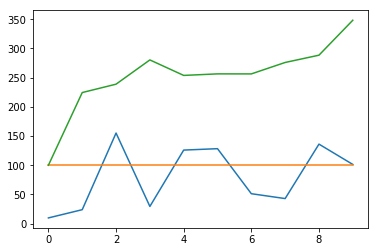

In [22]:
plt.plot(rewards[::100])
plt.plot([100 for _ in range(1000)][::100])
plt.plot(r2[::100])

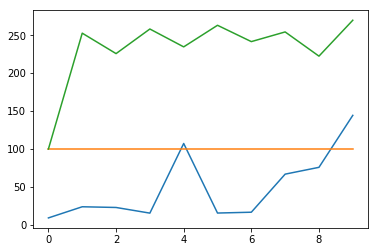

In [20]:
plt.plot(rewards[::100])
plt.plot([100 for _ in range(1000)][::100])
plt.plot(r2[::100])

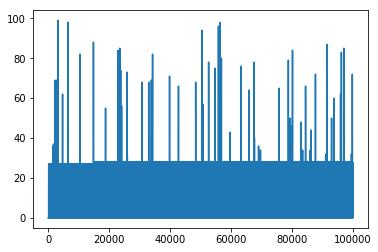

In [23]:
plt.plot(actions)